<a href="https://colab.research.google.com/github/LaiTienQuang/LaiTienQuang/blob/main/robot__forward_kinematics_3dof_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
upload=files.upload()

Saving robot_3b.csv to robot_3b.csv


In [3]:
data = pd.read_csv('robot_3b.csv')
data.shape
numpy_dataset = data.values

In [4]:
y=numpy_dataset[:,:3]
x=numpy_dataset[:,3:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [5]:
print("Original data is:",x_train)
print("Shape of data is: ",x_train.shape)

Original data is: [[-38.31135923  39.22025967 240.        ]
 [-32.49219793  90.31052203 140.        ]
 [-61.98013658  10.52610661 220.        ]
 ...
 [-58.62354616  30.52610661 220.        ]
 [  9.44263562  68.41658807 155.        ]
 [  7.36880329  56.53071801 160.        ]]
Shape of data is:  (267140, 3)


In [6]:
print("Original data is:",y_train)
print("Shape of data is: ",y_train.shape)

Original data is: [[ 75.  80.  85.]
 [ 65.  75.   0.]
 [ 95. 115.  10.]
 ...
 [ 85.  95.  40.]
 [ 20.  85.  50.]
 [ 10. 100.  50.]]
Shape of data is:  (267140, 3)


In [7]:
model = Sequential() 
model.add(Dense(32, activation='relu', input_shape = (3,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))
model.summary()
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 4,419
Trainable params: 4,419
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1670/1670 [==============================] - 9s 3ms/step - loss: 366.5866 - acc: 0.7388 - val_loss: 313.9375 - val_acc: 0.7628
Epoch 2/10
1670/1670 [==========================

In [8]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1])

sai so kiem tra la 17.110319137573242
do chinh xac kiem tra 0.9599460959434509


[[126.561295   26.479137   31.403748 ]
 [  5.242229   83.85104    49.719948 ]
 [  6.9749446  59.481457   42.36991  ]
 ...
 [ 20.515356    7.2442884   6.8315077]
 [ 33.72867    62.116756   58.66948  ]
 [ 49.8003     13.004108   57.252155 ]]


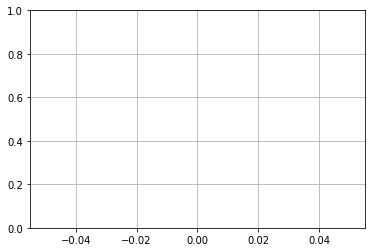

In [12]:
import pandas as pd
score = model.evaluate(x_test,y_test,verbose = 0)
y_pred = model.predict(x_test)
print(y_pred)
pd.DataFrame(history.history)
plt.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


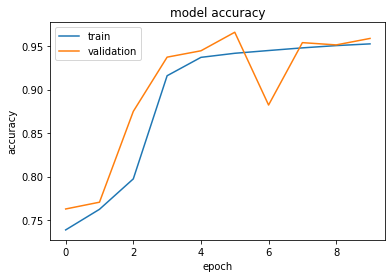

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

In [15]:
import math
Px_test_train = 20
Py_test_train = 50
phi = 90
print(Px_test_train,Py_test_train,phi)
test = model.predict([[Px_test_train,Py_test_train,phi]])
t1 = test[0][0]
t2 = test[0][1]
t3 = test[0][2]

x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))+30*math.cos(math.radians(t1+t2+t3))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))+30*math.sin(math.radians(t1+t2+t3))
print('x = ',x_1,'y = ',y_1)
print(t1,t2,t3)

20 50 90
x =  34.82369322538629 y =  56.409967253139605
-13.977327 118.6105 -7.758973


In [ ]:
model.save('Robot_3dof.h5')